In [ ]:
from google.colab import drive
drive.mount('/content/drive')

print("Google Drive mounted successfully.")

Mounted at /content/drive
Google Drive mounted successfully.


In [ ]:
import pandas as pd

twitter_path = "/content/drive/MyDrive/training.1600000.processed.noemoticon.csv"

twitter_df = pd.read_csv(
    twitter_path,
    header=None,
    names=['target', 'id', 'date', 'flag', 'user', 'text'],
    encoding='latin1',
    low_memory=False
)

print("Twitter dataset loaded successfully!")
print("Shape:", twitter_df.shape)
print("Columns:", twitter_df.columns.tolist())

twitter_df.head()

Twitter dataset loaded successfully!
Shape: (1600000, 6)
Columns: ['target', 'id', 'date', 'flag', 'user', 'text']


,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
import pandas as pd

reddit_path = "/content/drive/MyDrive/Suicide_Detection.csv"

reddit_df = pd.read_csv(
    reddit_path,
    encoding='latin1',
    low_memory=False
)

print("Reddit dataset loaded successfully!")
print("Shape:", reddit_df.shape)
print("Columns:", reddit_df.columns.tolist())

reddit_df.head()

Reddit dataset loaded successfully!
Shape: (232074, 3)
Columns: ['Unnamed: 0', 'text', 'class']


,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"Iâm so lostHello, my name is Adam (16) and I...",suicide


In [ ]:
import pandas as pd
import re

try:
    twitter_df
except NameError:
    twitter_path = "/content/drive/MyDrive/training.1600000.processed.noemoticon.csv"
    twitter_df = pd.read_csv(twitter_path, header=None, names=['target','id','date','flag','user','text'], encoding='latin1', low_memory=False)

sent_map = {0: 'negative', 2: 'neutral', 4: 'positive'}
twitter_df['sentiment'] = twitter_df['target'].map(sent_map).fillna('unknown')

twitter_df['tweet_date_parsed'] = pd.to_datetime(twitter_df['date'], errors='coerce')
twitter_df['year'] = twitter_df['tweet_date_parsed'].dt.year

mask = twitter_df['year'].isna()
if mask.any():
    twitter_df.loc[mask, 'year'] = twitter_df.loc[mask, 'date'].astype(str).str.extract(r'(\d{4})')[0]

twitter_df['year'] = pd.to_numeric(twitter_df['year'], errors='coerce').astype('Int64')

clean_twitter = twitter_df[['text','sentiment','year','user']].rename(columns={'user':'username'})

print("Clean Twitter shape:", clean_twitter.shape)
print("\nSentiment value counts:")
print(clean_twitter['sentiment'].value_counts())

print("\nYear counts (top 10):")
print(clean_twitter['year'].value_counts().head(10))

print("\nSample rows:")
display(clean_twitter.head(5))

twitter_out = '/content/clean_twitter.csv'
clean_twitter.to_csv(twitter_out, index=False)
print("\nSaved cleaned Twitter to:", twitter_out)

/tmp/ipython-input-2110843245.py:13: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  twitter_df['tweet_date_parsed'] = pd.to_datetime(twitter_df['date'], errors='coerce')


Clean Twitter shape: (1600000, 4)

Sentiment value counts:
sentiment
negative    800000
positive    800000
Name: count, dtype: int64

Year counts (top 10):
year
2009    1600000
Name: count, dtype: Int64

Sample rows:


,text,sentiment,year,username
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,2009,_TheSpecialOne_
1,is upset that he can't update his Facebook by ...,negative,2009,scotthamilton
2,@Kenichan I dived many times for the ball. Man...,negative,2009,mattycus
3,my whole body feels itchy and like its on fire,negative,2009,ElleCTF
4,"@nationwideclass no, it's not behaving at all....",negative,2009,Karoli



Saved cleaned Twitter to: /content/clean_twitter.csv


In [ ]:
import pandas as pd

try:
    reddit_df
except NameError:
    reddit_path = "/content/drive/MyDrive/Suicide_Detection.csv"
    reddit_df = pd.read_csv(reddit_path, low_memory=False, encoding='latin1')

if 'Unnamed: 0' in reddit_df.columns:
    reddit_df = reddit_df.drop(columns=['Unnamed: 0'])

reddit_df = reddit_df.rename(columns={'text': 'text', 'class': 'label'})

label_map = {
    'suicide': 'negative',
    'non-suicide': 'positive'
}
reddit_df['sentiment'] = reddit_df['label'].map(label_map).fillna('unknown')

reddit_df['year'] = reddit_df['text'].astype(str).str.extract(r'(\d{4})')
reddit_df['year'] = pd.to_numeric(reddit_df['year'], errors='coerce').astype('Int64')

clean_reddit = reddit_df[['text', 'sentiment', 'year']]

print("Clean Reddit shape:", clean_reddit.shape)

print("\nSentiment counts:")
print(clean_reddit['sentiment'].value_counts())

print("\nYear counts (top 10):")
print(clean_reddit['year'].value_counts().head(10))

print("\nSample rows:")
display(clean_reddit.head(5))

reddit_out = '/content/clean_reddit.csv'
clean_reddit.to_csv(reddit_out, index=False)
print("\nSaved cleaned Reddit to:", reddit_out)

Clean Reddit shape: (232074, 3)

Sentiment counts:
sentiment
negative    116037
positive    116037
Name: count, dtype: int64

Year counts (top 10):
year
2020    1108
1000     566
2019     476
2021     438
2018     422
2017     384
2016     364
2015     277
2000     256
2014     206
Name: count, dtype: Int64

Sample rows:


,text,sentiment,year
0,Ex Wife Threatening SuicideRecently I left my ...,negative,<NA>
1,Am I weird I don't get affected by compliments...,positive,<NA>
2,Finally 2020 is almost over... So I can never ...,positive,2020
3,i need helpjust help me im crying so hard,negative,<NA>
4,"Iâm so lostHello, my name is Adam (16) and I...",negative,<NA>



Saved cleaned Reddit to: /content/clean_reddit.csv


In [ ]:
# master dataset

import pandas as pd

clean_twitter = pd.read_csv("/content/clean_twitter.csv", low_memory=False)
clean_reddit = pd.read_csv("/content/clean_reddit.csv", low_memory=False)

clean_twitter['platform'] = 'twitter'
clean_reddit['platform'] = 'reddit'

clean_twitter = clean_twitter[['text','sentiment','year','platform']]
clean_reddit = clean_reddit[['text','sentiment','year','platform']]

master_df = pd.concat([clean_twitter, clean_reddit], ignore_index=True)

print("MASTER combined shape:", master_df.shape)
print("Platform counts:")
print(master_df['platform'].value_counts())

print("\nSentiment counts:")
print(master_df['sentiment'].value_counts())

print("\nYear counts (top 10):")
print(master_df['year'].value_counts().head(10))

master_path = "/content/MASTER_DATASET.csv"
master_df.to_csv(master_path, index=False)

print("\nSaved MASTER DATASET to:", master_path)

master_df.head()

MASTER combined shape: (1832074, 4)
Platform counts:
platform
twitter    1600000
reddit      232074
Name: count, dtype: int64

Sentiment counts:
sentiment
negative    916037
positive    916037
Name: count, dtype: int64

Year counts (top 10):
year
2009.0    1600082
2020.0       1108
1000.0        566
2019.0        476
2021.0        438
2018.0        422
2017.0        384
2016.0        364
2015.0        277
2000.0        256
Name: count, dtype: int64

Saved MASTER DATASET to: /content/MASTER_DATASET.csv


,text,sentiment,year,platform
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,2009.0,twitter
1,is upset that he can't update his Facebook by ...,negative,2009.0,twitter
2,@Kenichan I dived many times for the ball. Man...,negative,2009.0,twitter
3,my whole body feels itchy and like its on fire,negative,2009.0,twitter
4,"@nationwideclass no, it's not behaving at all....",negative,2009.0,twitter


In [ ]:
import pandas as pd

master_path = "/content/MASTER_DATASET.csv"
master_df = pd.read_csv(master_path, low_memory=False)

print("MASTER dataset loaded!")
print("Shape:", master_df.shape)
print("\nColumns:", master_df.columns.tolist())

print("\n--- Sentiment Distribution ---")
print(master_df['sentiment'].value_counts())

print("\n--- Platform Distribution ---")
print(master_df['platform'].value_counts())

print("\n--- Year Distribution (Top 10) ---")
print(master_df['year'].value_counts().head(10))

master_df.head()

MASTER dataset loaded!
Shape: (1832074, 4)

Columns: ['text', 'sentiment', 'year', 'platform']

--- Sentiment Distribution ---
sentiment
negative    916037
positive    916037
Name: count, dtype: int64

--- Platform Distribution ---
platform
twitter    1600000
reddit      232074
Name: count, dtype: int64

--- Year Distribution (Top 10) ---
year
2009.0    1600082
2020.0       1108
1000.0        566
2019.0        476
2021.0        438
2018.0        422
2017.0        384
2016.0        364
2015.0        277
2000.0        256
Name: count, dtype: int64


,text,sentiment,year,platform
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,2009.0,twitter
1,is upset that he can't update his Facebook by ...,negative,2009.0,twitter
2,@Kenichan I dived many times for the ball. Man...,negative,2009.0,twitter
3,my whole body feels itchy and like its on fire,negative,2009.0,twitter
4,"@nationwideclass no, it's not behaving at all....",negative,2009.0,twitter


/tmp/ipython-input-3788376741.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=plot_df, x='sentiment', palette='viridis')


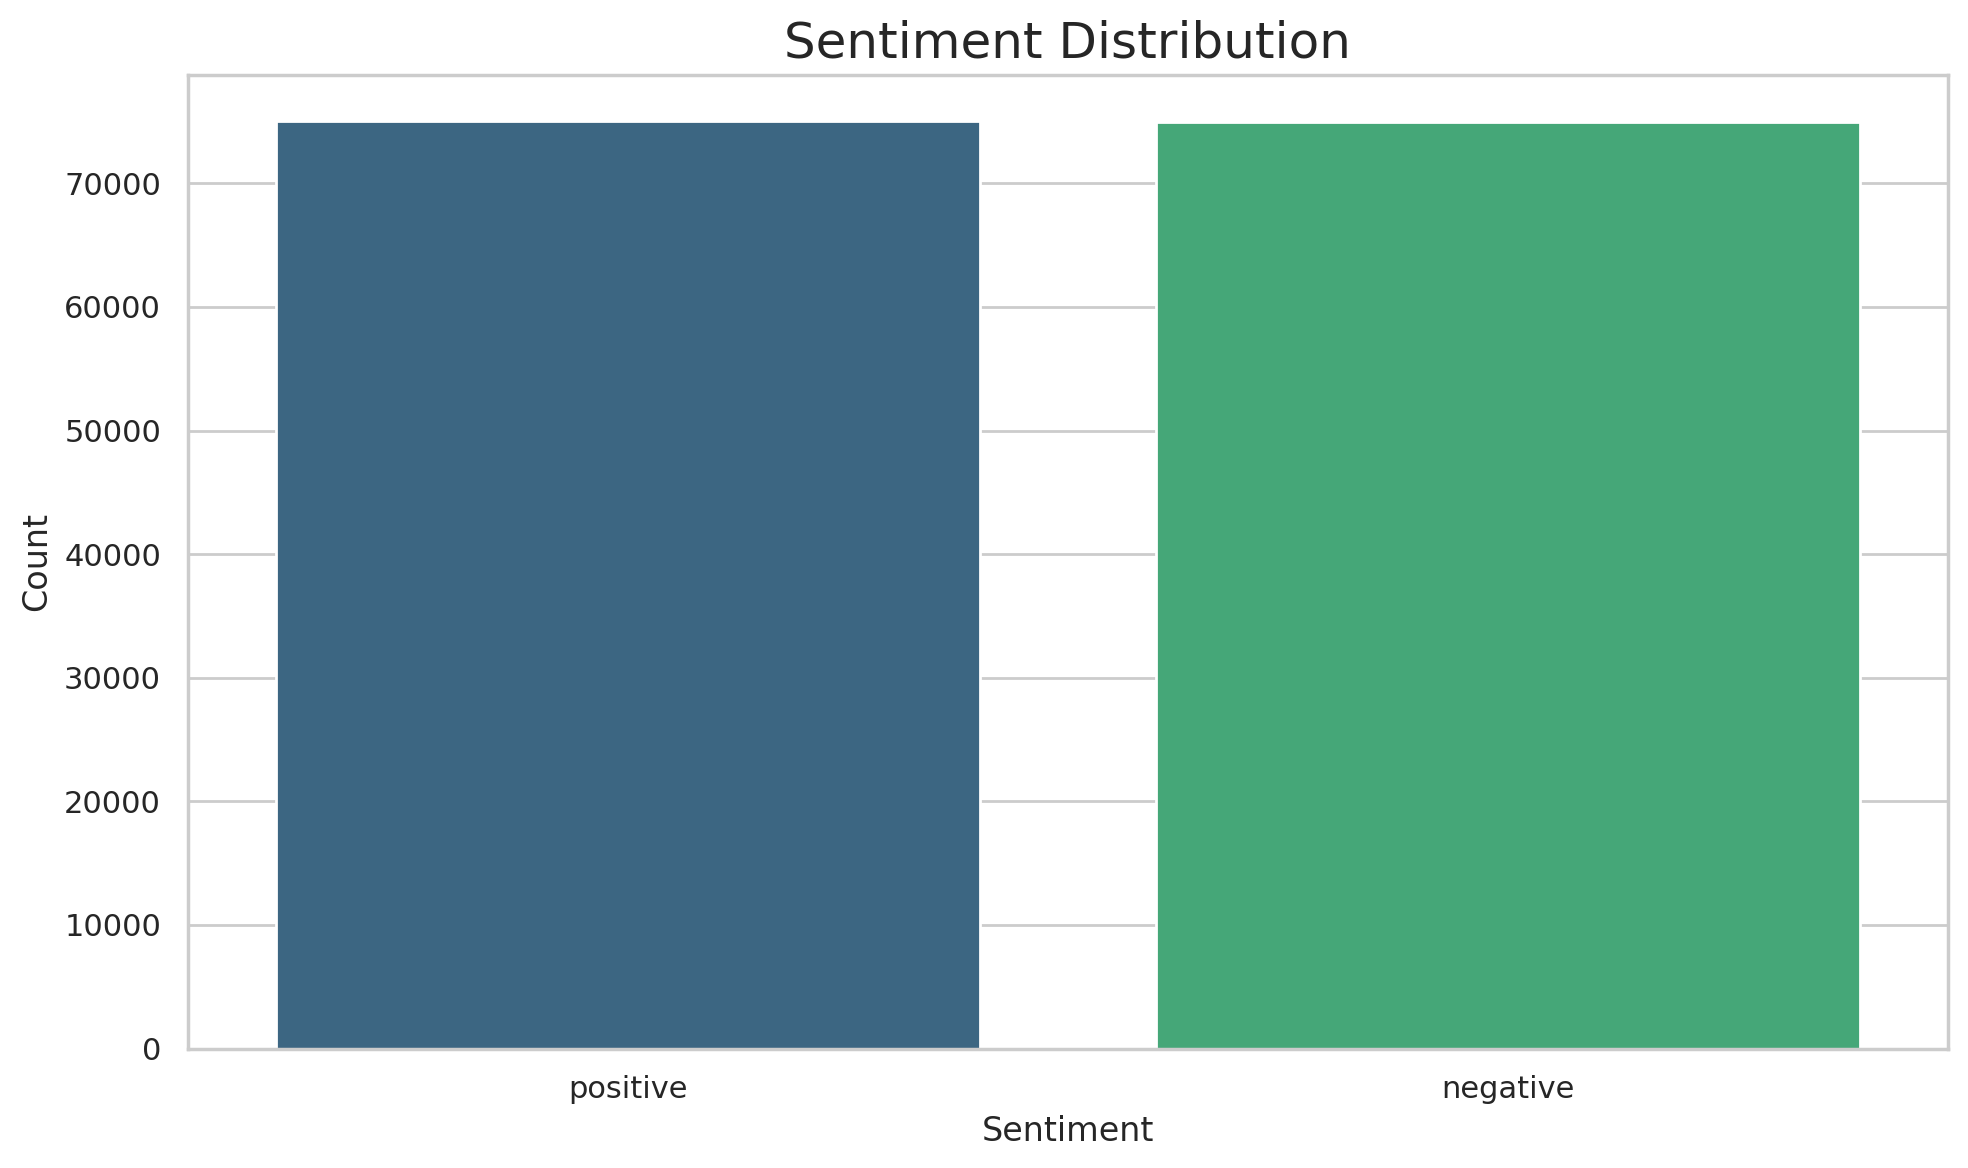

/tmp/ipython-input-3788376741.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=plot_df, x='platform', palette='mako')


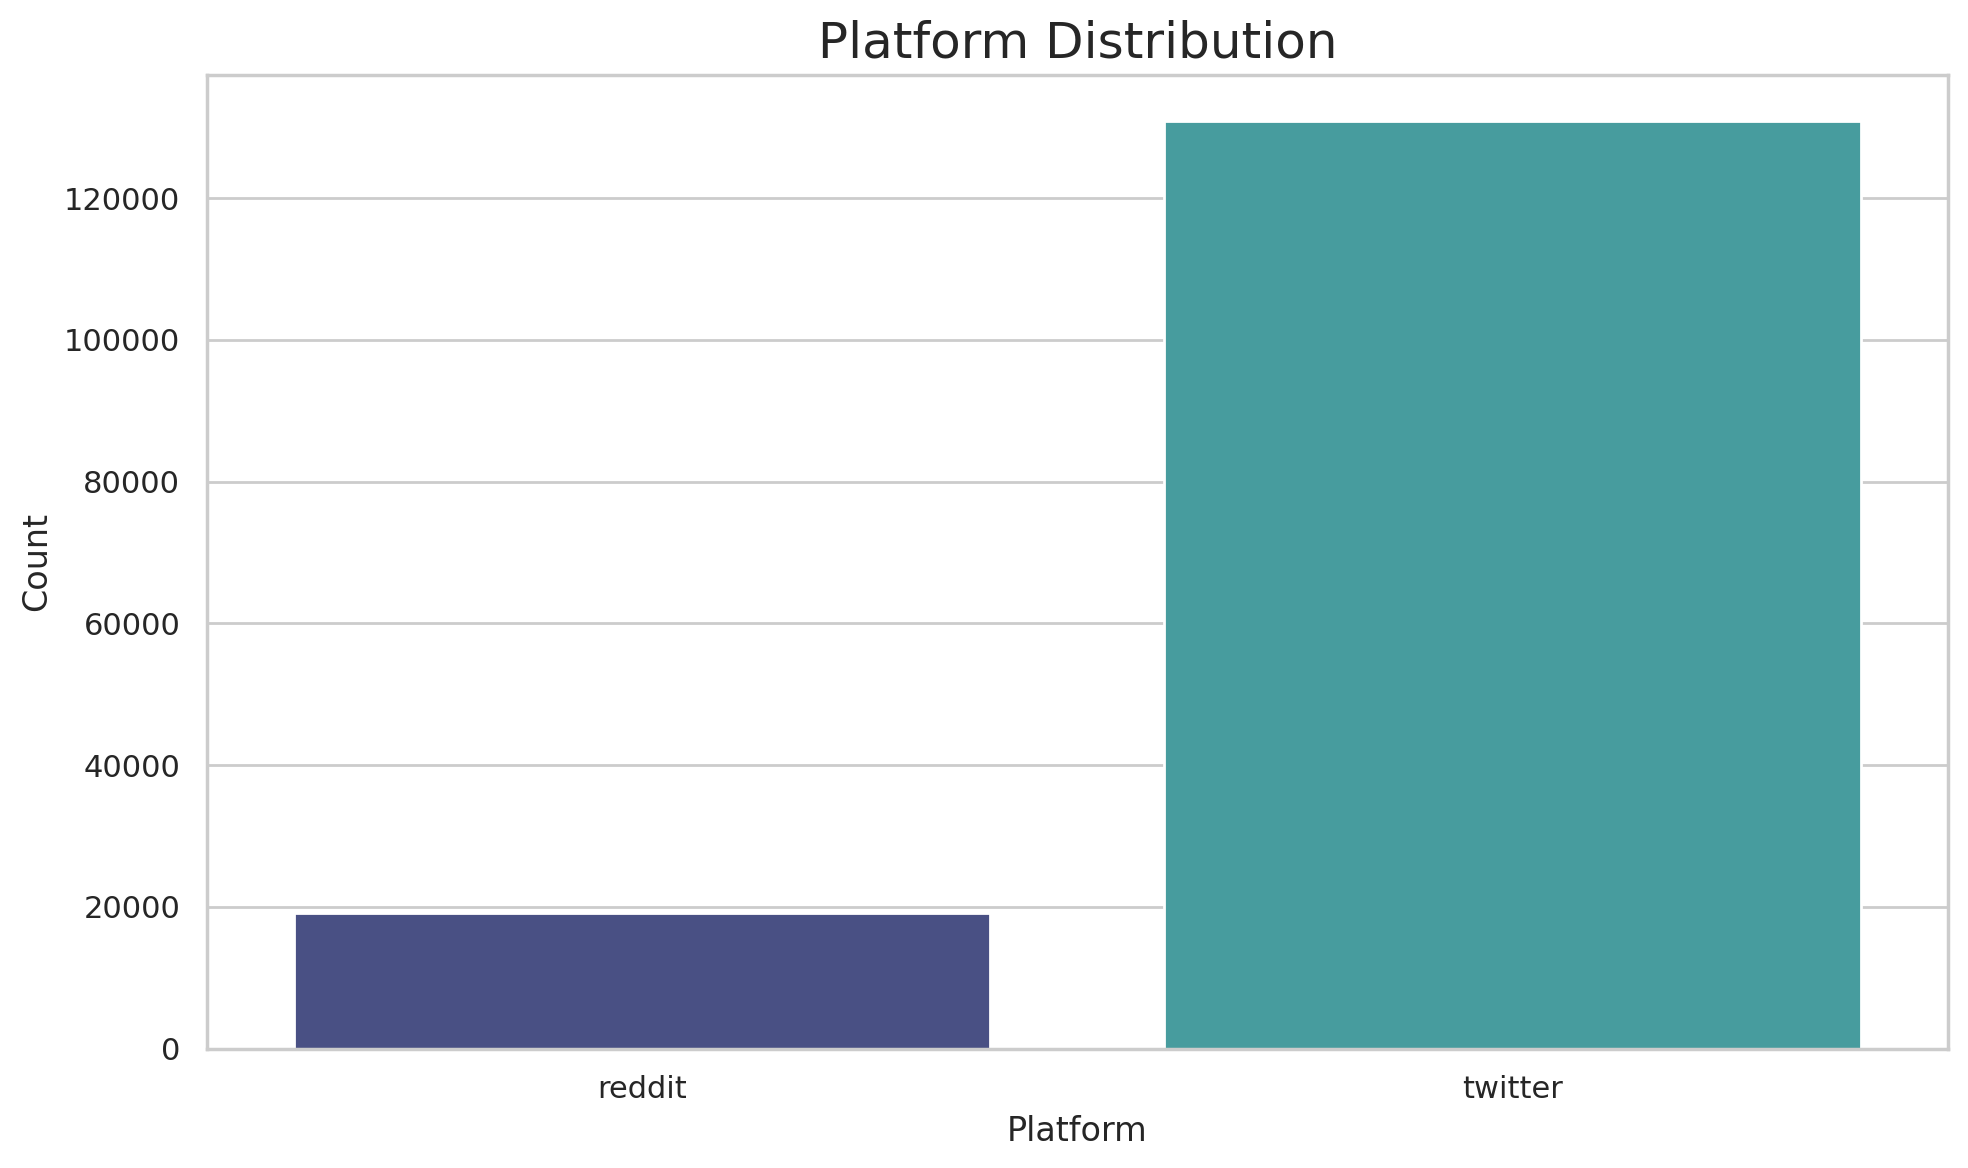

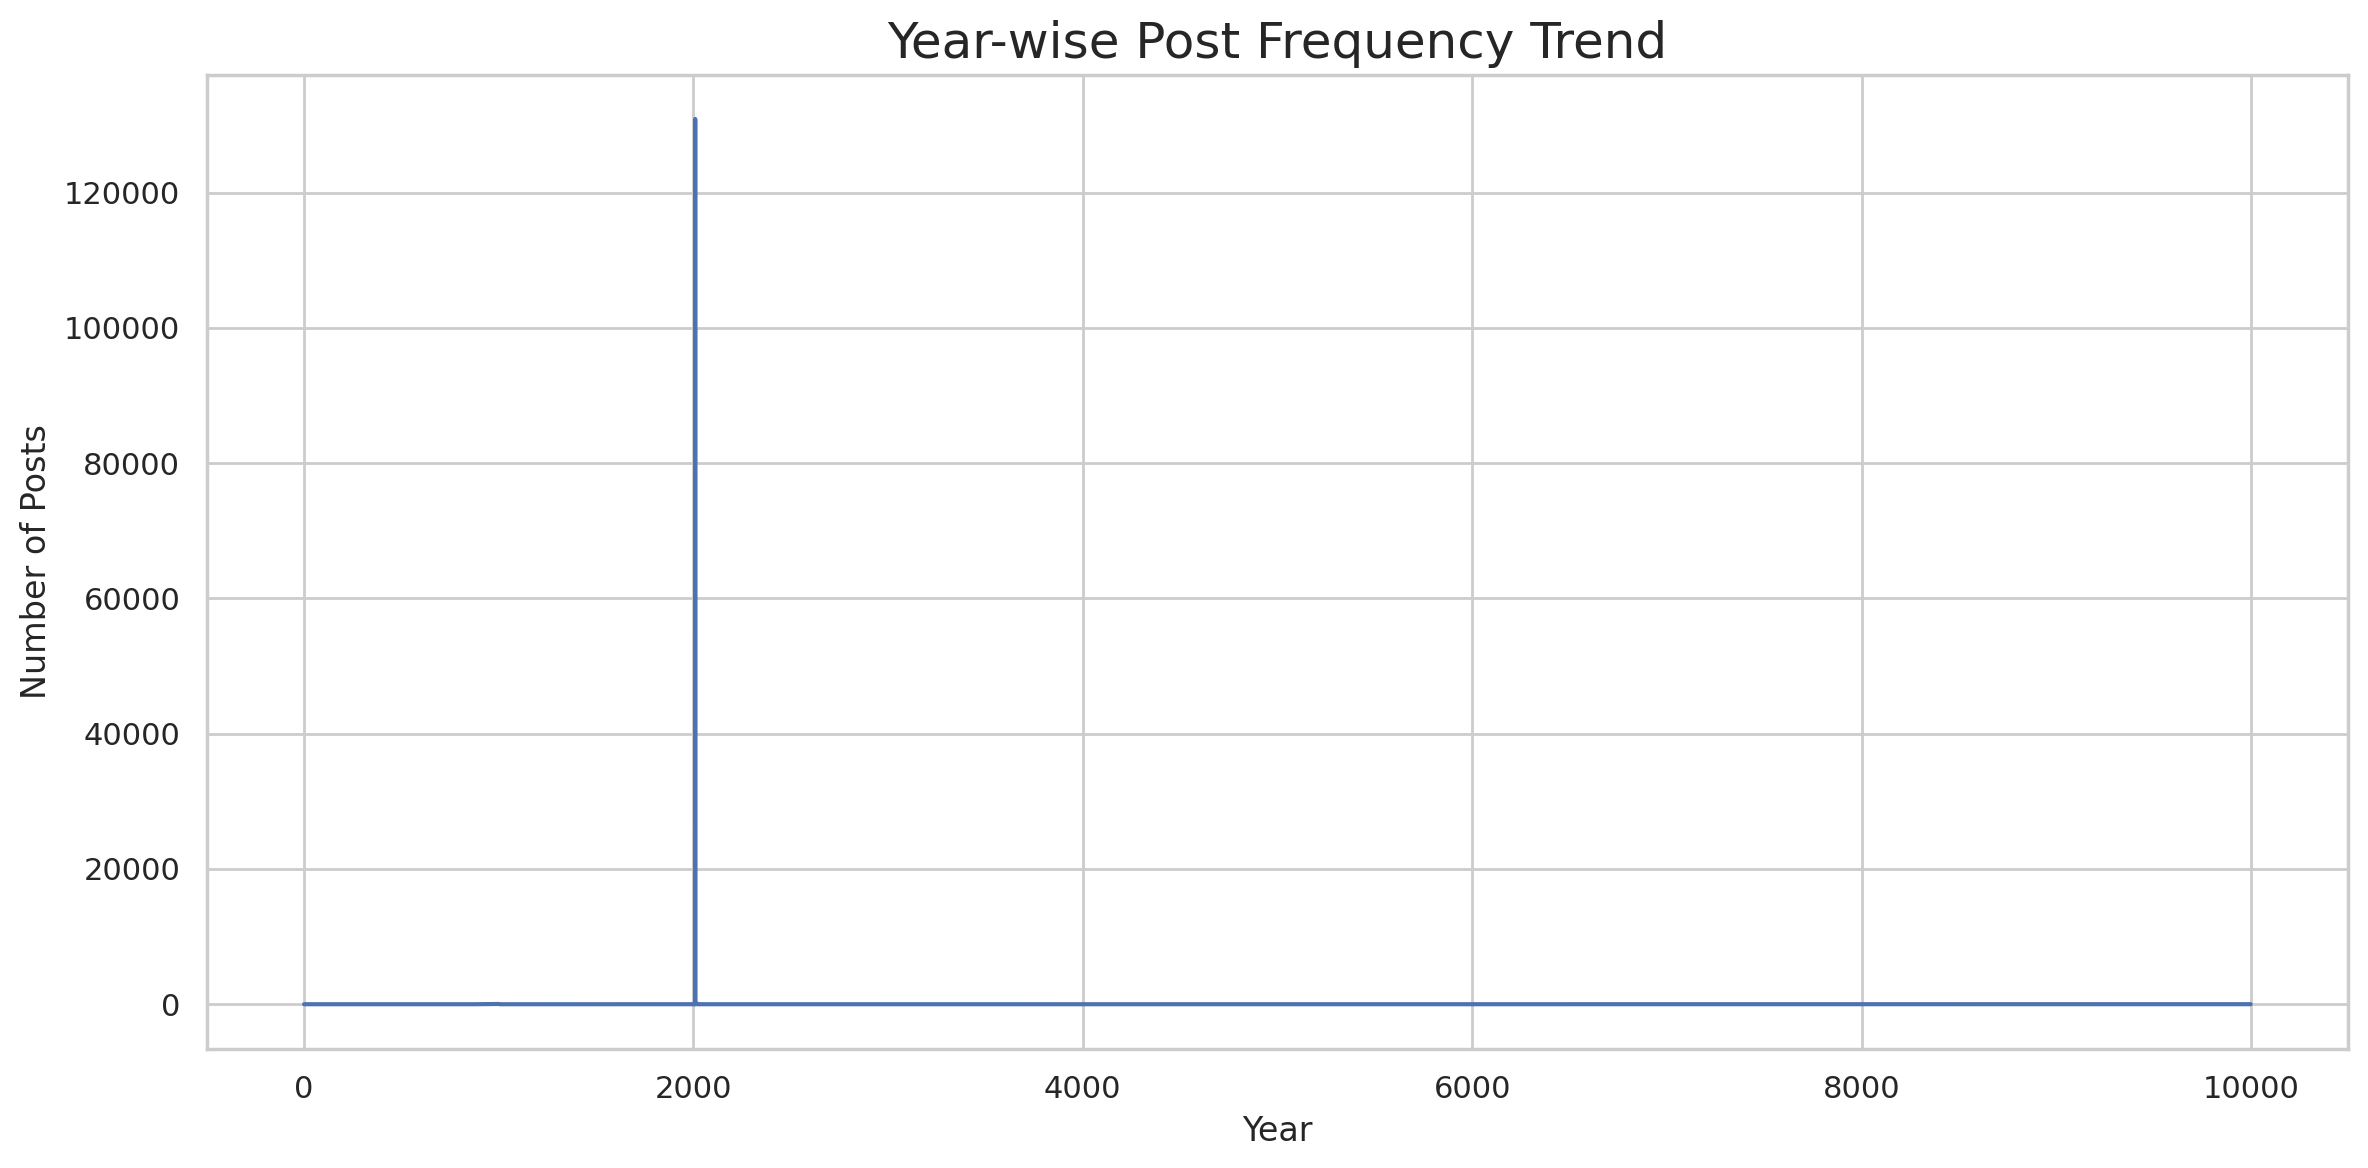

HD charts saved to:
/content/sentiment_distribution.png
/content/platform_distribution.png
/content/year_trend.png


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

master_path = "/content/MASTER_DATASET.csv"
master_df = pd.read_csv(master_path)

plot_df = master_df.sample(150000, random_state=42)

sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 200

plt.figure(figsize=(10, 6))
sns.countplot(data=plot_df, x='sentiment', palette='viridis')
plt.title("Sentiment Distribution", fontsize=18)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("/content/sentiment_distribution.png")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=plot_df, x='platform', palette='mako')
plt.title("Platform Distribution", fontsize=18)
plt.xlabel("Platform")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("/content/platform_distribution.png")
plt.show()

year_count = plot_df['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=year_count.index, y=year_count.values)
plt.title("Year-wise Post Frequency Trend", fontsize=18)
plt.xlabel("Year")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.savefig("/content/year_trend.png")
plt.show()

print("HD charts saved to:")
print("/content/sentiment_distribution.png")
print("/content/platform_distribution.png")
print("/content/year_trend.png")

In [1]:
import pandas as pd

path = "/mnt/data/digital_habits_vs_mental_health.csv"

try:
    df1 = pd.read_csv(path, low_memory=False)
except:
    df1 = pd.read_csv(path, encoding='latin1', low_memory=False)

print("Shape:", df1.shape)
print("Columns:", df1.columns.tolist())
df1.head()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/digital_habits_vs_mental_health.csv'